## 📌 Análise Preditiva para Aprovação de Empréstimos
Sobre o dataset: O conjunto de dados de aprovação de empréstimo é uma coleção de registros financeiros e informações associadas usadas para determinar a elegibilidade de indivíduos ou organizações para obter empréstimos de uma instituição de empréstimo. Inclui vários fatores, como pontuação cibil, renda, status de emprego, prazo do empréstimo, valor do empréstimo, valor dos ativos e status do empréstimo.


### **1️⃣ Objetivo**
Construir um modelo de **classificação** utilizando **Árvore de Decisão** para prever se um empréstimo será **aprovado ou rejeitado**, com base em diversas variáveis financeiras e pessoais.

### **2️⃣ Preparação dos Dados**
- **Variável Alvo:** `loan_status` (Aprovado ou Rejeitado)
- **Variáveis Explicativas:**
  - `cibil_score` (pontuação de crédito)
  - `loan_amount` (valor do empréstimo)
  - `loan_term` (prazo do empréstimo)
  - `residential_assets_value` (ativos residenciais)
  - `income_annum` (renda anual)
  - Outras características como número de dependentes e nível educacional.

Divisão dos dados:
- **80%** para treinamento
- **20%** para teste

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score

In [2]:
# Carregando os dados
dados = pd.read_csv("loan_approval_dataset.csv")
dados.head(15)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [3]:
#Retorna o número de linhas e o número de colunas
print(dados.shape)

(4269, 13)


In [4]:
# Estatísticas descritivas
print(dados.describe())

           loan_id   no_of_dependents   income_annum   loan_amount  \
count  4269.000000        4269.000000   4.269000e+03  4.269000e+03   
mean   2135.000000           2.498712   5.059124e+06  1.513345e+07   
std    1232.498479           1.695910   2.806840e+06  9.043363e+06   
min       1.000000           0.000000   2.000000e+05  3.000000e+05   
25%    1068.000000           1.000000   2.700000e+06  7.700000e+06   
50%    2135.000000           3.000000   5.100000e+06  1.450000e+07   
75%    3202.000000           4.000000   7.500000e+06  2.150000e+07   
max    4269.000000           5.000000   9.900000e+06  3.950000e+07   

         loan_term   cibil_score   residential_assets_value  \
count  4269.000000   4269.000000               4.269000e+03   
mean     10.900445    599.936051               7.472617e+06   
std       5.709187    172.430401               6.503637e+06   
min       2.000000    300.000000              -1.000000e+05   
25%       6.000000    453.000000               2.20000

In [5]:
#Retorna a quantidade de dados faltantes
print(dados.isnull().sum())

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


In [6]:
#Retorna a quantidade de dados duplicados
print(dados.duplicated().sum()) #Retorna a quantidade de dados duplicados

0


In [7]:
# Resumo dos dados
print(dados.info())  # Informações sobre as colunas e tipos de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
None


In [8]:
dados.columns = dados.columns.str.strip()

In [9]:
# Análise exploratória
discrete_vars = ['no_of_dependents', 'education', 'self_employed', 'loan_status']
continuous_vars = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

In [10]:
# Preparação dos dados
X = dados.drop(columns=['loan_id', 'loan_status'])
y = dados['loan_status']
X = pd.get_dummies(X, drop_first=True)  # Convertendo variáveis categóricas


In [11]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Criando e treinando a Árvore de Decisão
modelo = DecisionTreeClassifier(max_depth=3, random_state=42)
modelo.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=3, random_state=42)

In [13]:
y_pred = modelo.predict(X_test)

### **3️⃣ Modelo de Classificação - Árvore de Decisão**
- Modelo treinado com profundidade máxima de **4** (para evitar overfitting).
- Acurácia do modelo: **97%** 🚀

In [14]:
# Acurácia do modelo
acuracia = accuracy_score(y_test, y_pred)
print(f'Acurácia da Árvore de Decisão: {acuracia:.2f}')

Acurácia da Árvore de Decisão: 0.96


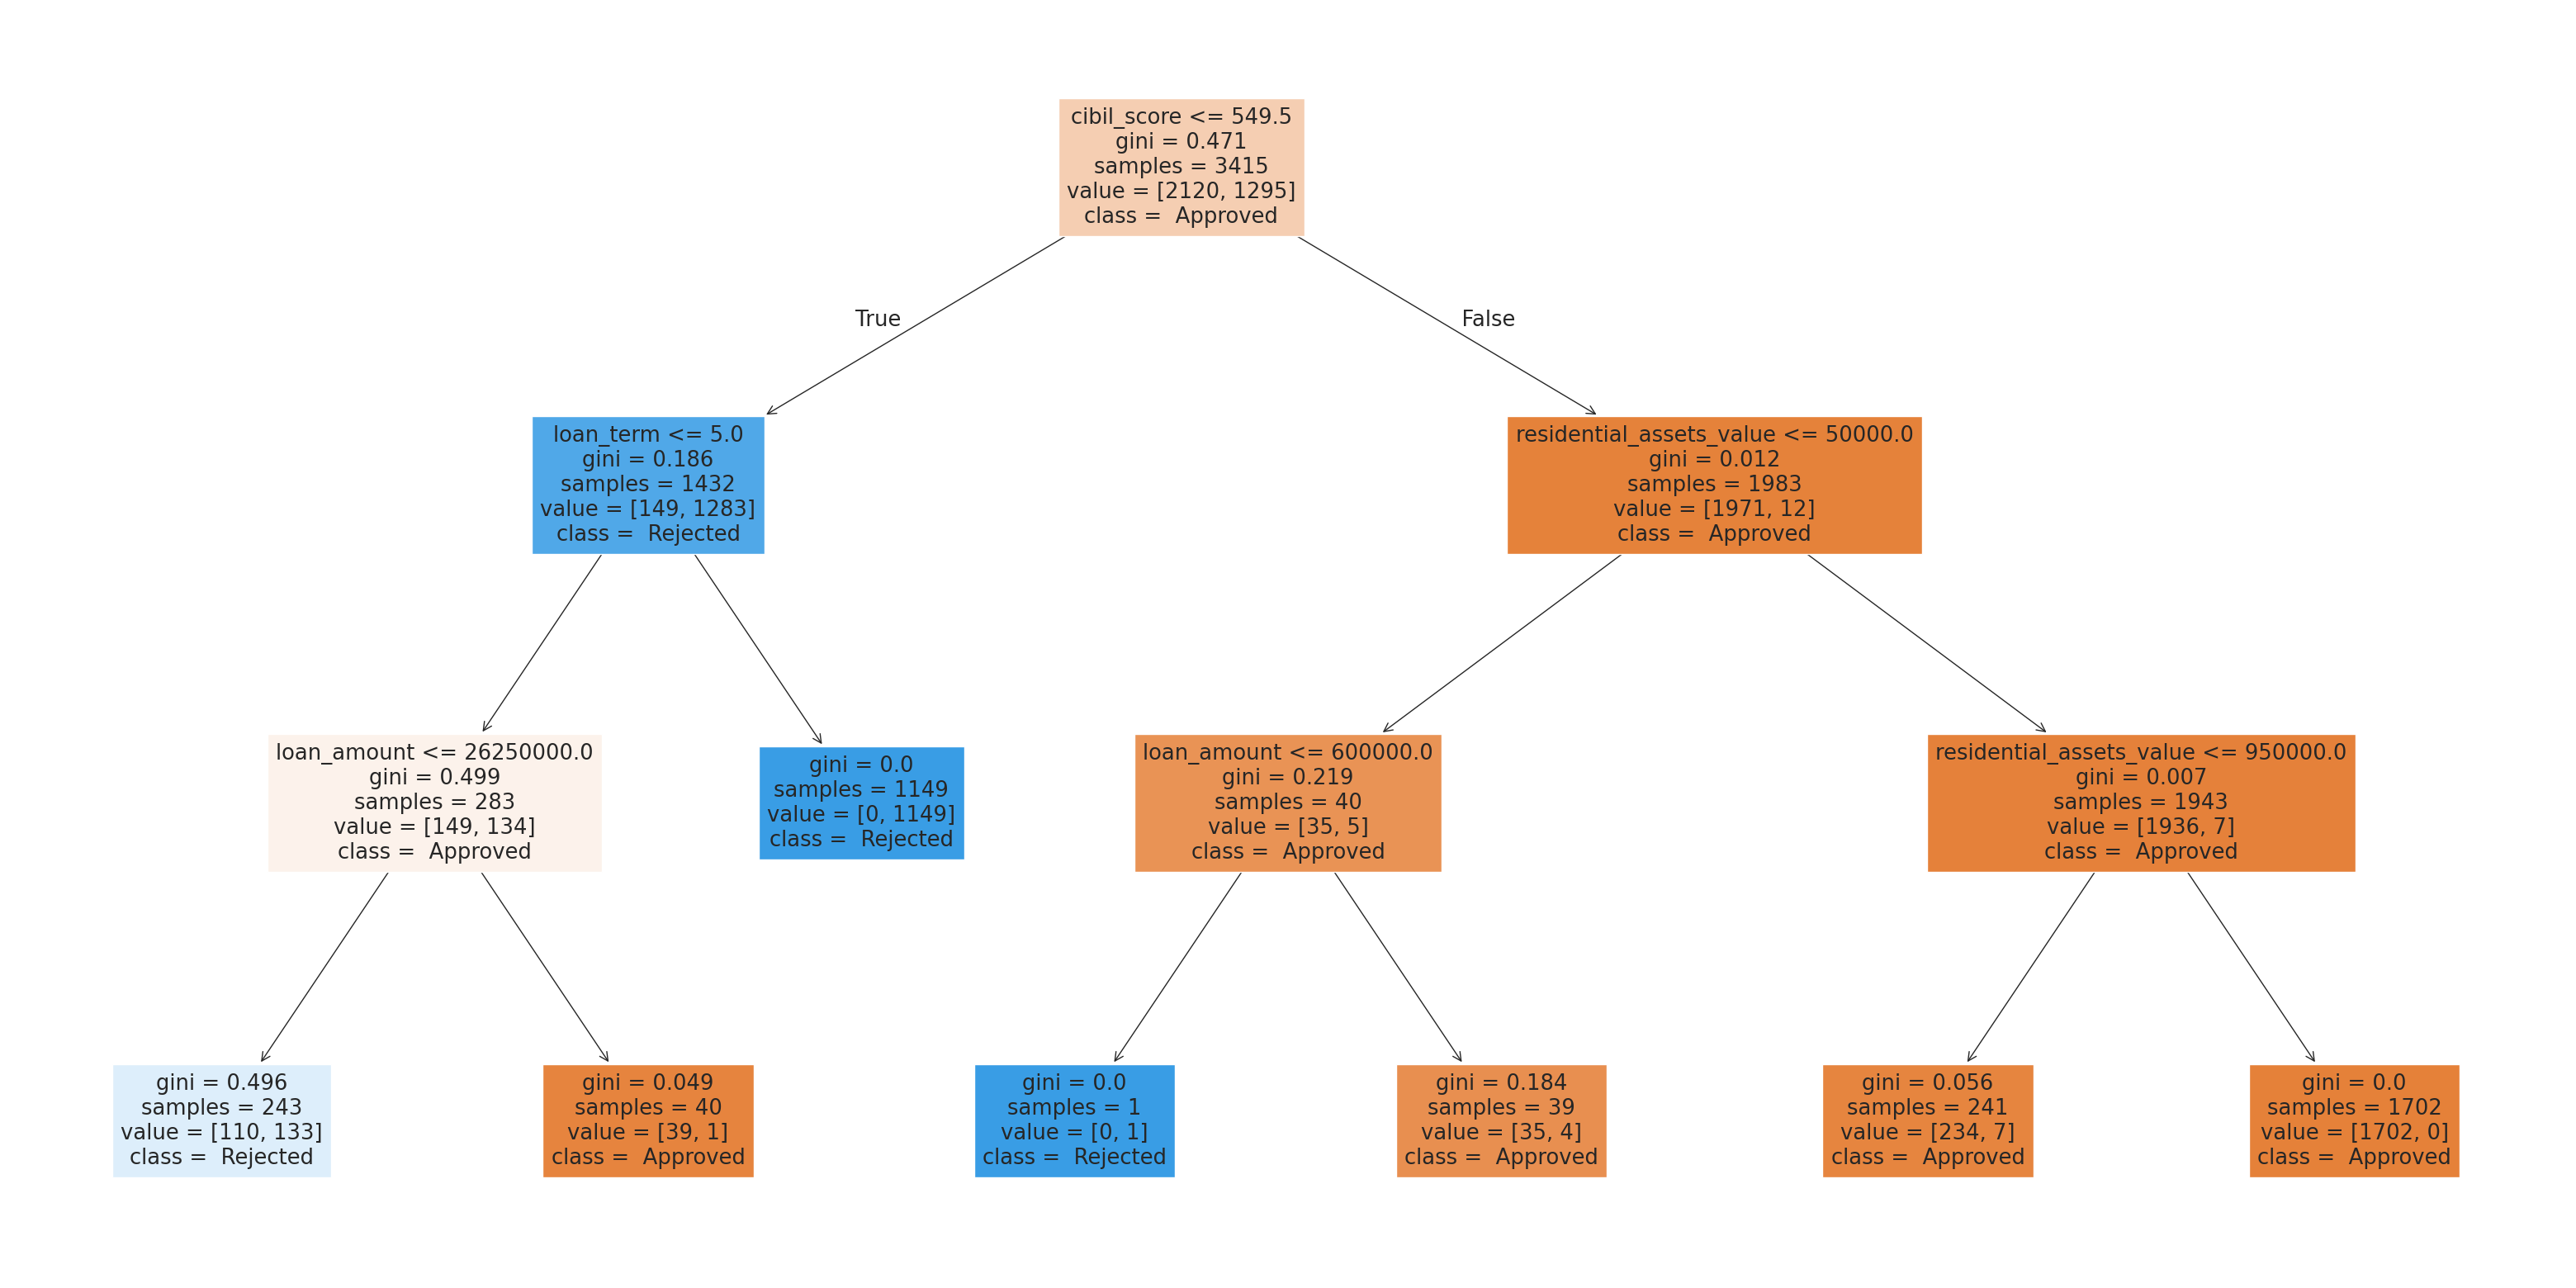

In [15]:
# Visualizando a Árvore de Decisão
plt.figure(figsize=(40, 20))
plot_tree(modelo, feature_names=X.columns, class_names=modelo.classes_, filled=True)
plt.show()

# 🌳 Árvore de Decisão para Aprovação de Empréstimos

## 📌 **Como interpretar?**
1. **Cada nó representa uma decisão baseada em um critério**, como `cibil_score`, `loan_term`, `loan_amount` e `residential_assets_value`.
2. **Os valores dentro dos nós indicam**:
   - `gini`: Impureza do nó (quanto mais próximo de 0, mais puro ele é).
   - `samples`: Número de amostras naquele nó.
   - `value`: Distribuição entre classes (Exemplo: `[Aprovados, Rejeitados]`).
   - `class`: Classe dominante naquele nó (Aprovado ou Rejeitado).

---

## 🔍 **Análise da Árvore**
1. **Raiz da Árvore** (Primeira Decisão)
   - O critério inicial é `cibil_score <= 549.5`.
   - Se **sim (True)** → Segue para avaliar `loan_term`.
   - Se **não (False)** → Segue para avaliar `residential_assets_value`.

2. **Se `cibil_score` for menor ou igual a 549.5** (lado esquerdo):
   - Se `loan_term <= 5.0`, há um **baixo índice de rejeição** (`gini = 0.186`).
   - Dentro dessa categoria:
     - Se `loan_amount <= 26.25M`, há **risco equilibrado** entre aprovação e rejeição (`gini = 0.499`).
     - Se `loan_amount` for maior, a aprovação se torna mais provável (`gini = 0.049`).

3. **Se `cibil_score` for maior que 549.5** (lado direito):
   - Se `residential_assets_value <= 50,000`, quase todos os empréstimos são aprovados (`gini = 0.012`).
   - Se `residential_assets_value` for maior, a chance de aprovação é **altíssima**:
     - Se os ativos residenciais forem superiores a `950,000`, a taxa de aprovação é **praticamente 100%** (`gini = 0.0`).

---

## 🏆 **Conclusões**
- **O `cibil_score` é um fator crítico na decisão de aprovação**.
- **Empréstimos de curto prazo (`loan_term <= 5.0`) são mais propensos à rejeição**.
- **Pessoas com altos ativos residenciais têm quase certeza de aprovação**.
- **Valores muito altos de empréstimos tendem a aumentar a incerteza na decisão**.

Essa árvore ajuda a entender quais fatores são mais relevantes para aprovação de um empréstimo! 🚀


### **4️⃣ Importância das Variáveis**

| Variável                  | Importância |
|--------------------------|------------|
| **cibil_score**          | 🏆 Mais relevante |
| **loan_amount**          | Alta |
| **loan_term**            | Média |
| **residential_assets_value** | Média |
| **income_annum**         | Baixa |


In [16]:
# Variável alvo
target_variable = 'loan_status'
print(f'Variável Alvo: {target_variable}')

Variável Alvo: loan_status


In [17]:
# Variáveis explicativas
explanatory_variables = X.columns.tolist()
print('Variáveis Explicativas:', explanatory_variables)

Variáveis Explicativas: ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'education_ Not Graduate', 'self_employed_ Yes']


In [18]:
# Extração das regras
regras = export_text(modelo, feature_names=list(X.columns))
print(regras)

|--- cibil_score <= 549.50
|   |--- loan_term <= 5.00
|   |   |--- loan_amount <= 26250000.00
|   |   |   |--- class:  Rejected
|   |   |--- loan_amount >  26250000.00
|   |   |   |--- class:  Approved
|   |--- loan_term >  5.00
|   |   |--- class:  Rejected
|--- cibil_score >  549.50
|   |--- residential_assets_value <= 50000.00
|   |   |--- loan_amount <= 600000.00
|   |   |   |--- class:  Rejected
|   |   |--- loan_amount >  600000.00
|   |   |   |--- class:  Approved
|   |--- residential_assets_value >  50000.00
|   |   |--- residential_assets_value <= 950000.00
|   |   |   |--- class:  Approved
|   |   |--- residential_assets_value >  950000.00
|   |   |   |--- class:  Approved



In [19]:
# Importância das variáveis
importances = modelo.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


In [20]:
# Exibir a importância das variáveis
print("Importância das variáveis:")
print(feature_importance_df)

Importância das variáveis:
                     Feature  Importance
4                cibil_score    0.899152
3                  loan_term    0.085949
2                loan_amount    0.013867
5   residential_assets_value    0.001032
0           no_of_dependents    0.000000
1               income_annum    0.000000
6    commercial_assets_value    0.000000
7        luxury_assets_value    0.000000
8           bank_asset_value    0.000000
9    education_ Not Graduate    0.000000
10        self_employed_ Yes    0.000000


/tmp/ipykernel_19210/3991856262.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette='viridis')


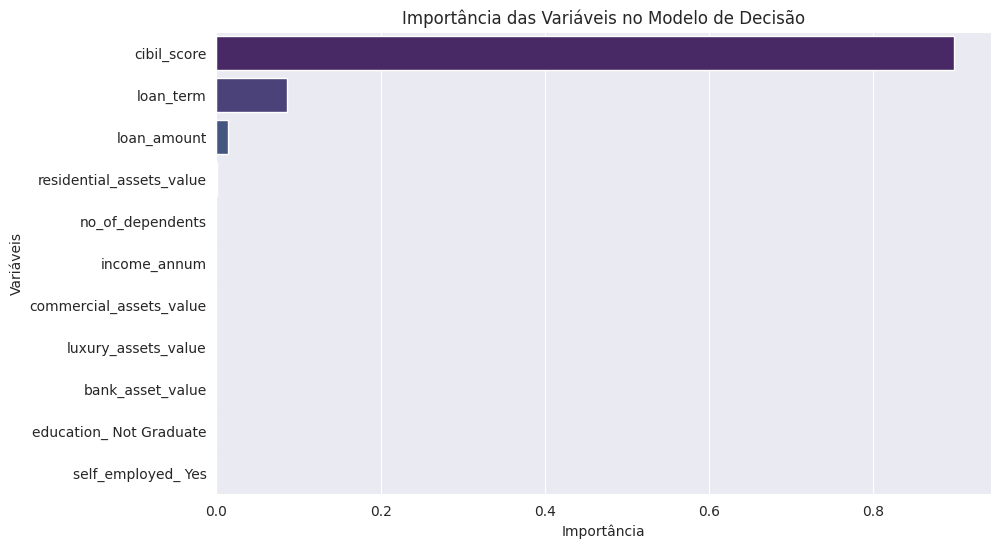

In [21]:
# Plotando a importância das variáveis
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette='viridis')
plt.title('Importância das Variáveis no Modelo de Decisão')
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.show()

🔹 **Conclusão:** A **pontuação de crédito (cibil_score)** é o fator mais determinante para aprovação ou rejeição do empréstimo.



### **5️⃣ Visualizações Geradas**
✅ **Gráficos de dispersão** para visualizar a relação entre renda anual e valor do empréstimo.
✅ **Matriz de correlação** para entender as relações entre variáveis.
✅ **Gráfico de importância das variáveis** para identificar os fatores mais influentes.


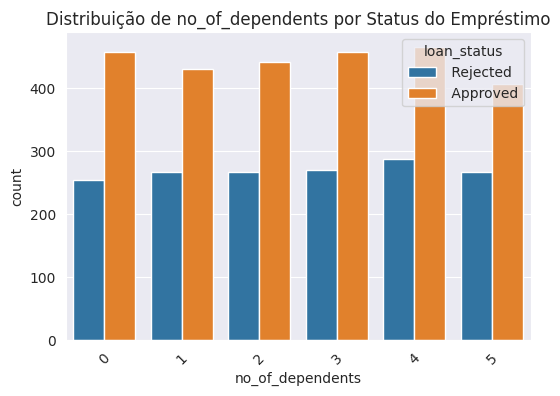

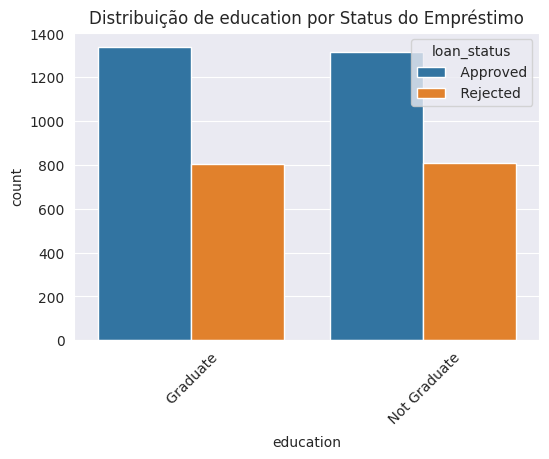

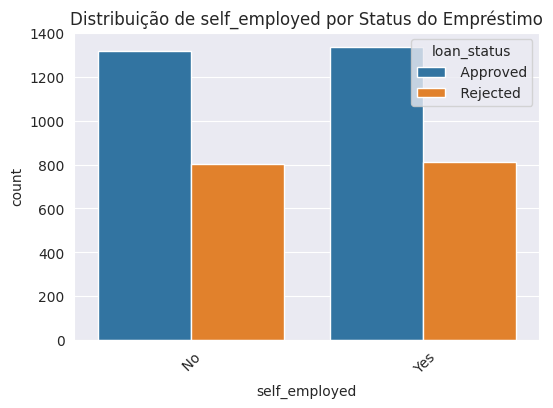

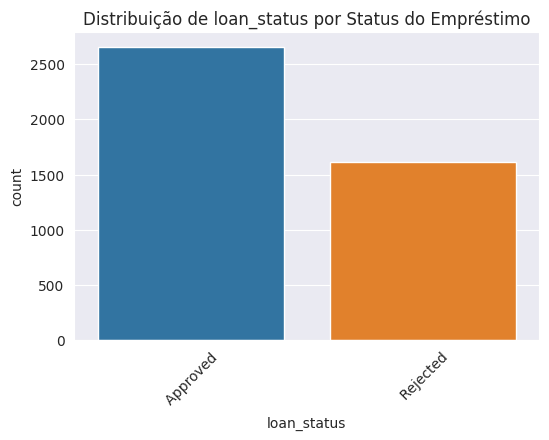

In [22]:
# Visualizando distribuições
for var in discrete_vars:
    plt.figure(figsize=(6,4))
    sns.countplot(x=dados[var], hue=dados['loan_status'])
    plt.title(f'Distribuição de {var} por Status do Empréstimo')
    plt.xticks(rotation=45)
    plt.show()

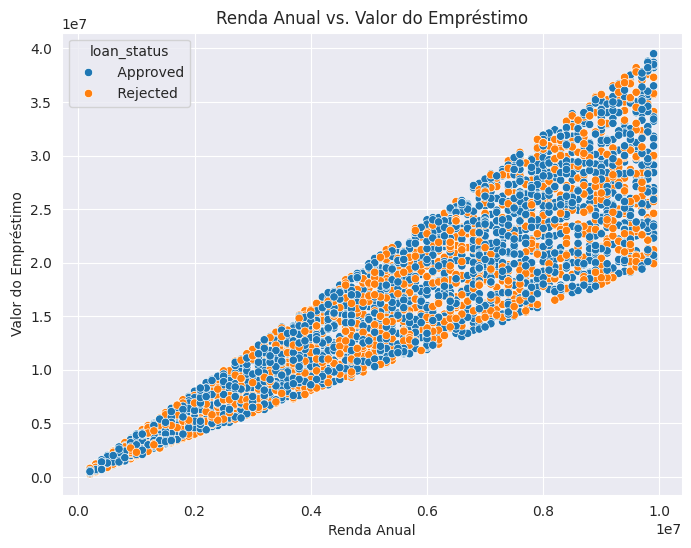

In [23]:
# Gráfico de dispersão entre renda anual e valor do empréstimo
plt.figure(figsize=(8,6))
sns.scatterplot(x=dados['income_annum'], y=dados['loan_amount'], hue=dados['loan_status'])
plt.title('Renda Anual vs. Valor do Empréstimo')
plt.xlabel('Renda Anual')
plt.ylabel('Valor do Empréstimo')
plt.show()


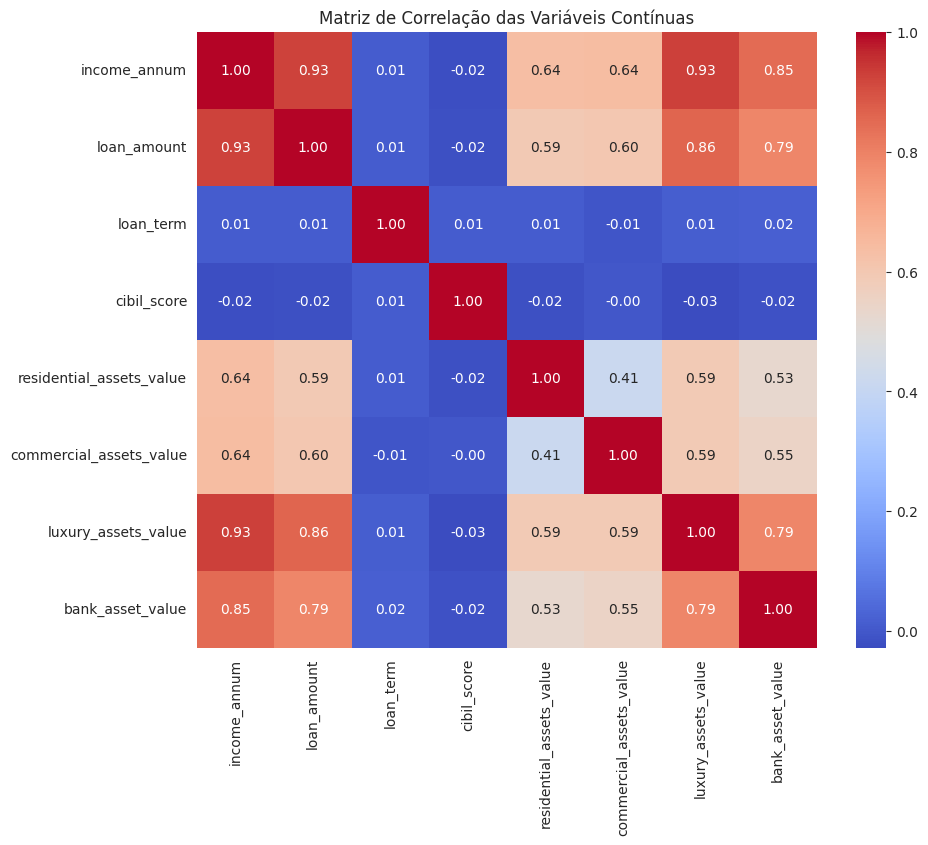

In [24]:
# Matriz de correlação
plt.figure(figsize=(10,8))
sns.heatmap(dados[continuous_vars].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação das Variáveis Contínuas')
plt.show()

# 📊 Matriz de Correlação das Variáveis Contínuas

### 🔥 **Interpretação da Matriz**
- **Correlação positiva (próxima de 1, vermelho escuro)** → As variáveis aumentam juntas.
- **Correlação negativa (próxima de -1, azul escuro)** → Quando uma aumenta, a outra diminui.
- **Correlação próxima de 0 (tons neutros)** → Pouca ou nenhuma relação entre as variáveis.

---

### 🔎 **Principais Análises**
1. **Renda Anual (`income_annum`)**  
   - Alta correlação com:
     - **Valor do empréstimo (`loan_amount`)** → `0.93`
     - **Ativos de luxo (`luxury_assets_value`)** → `0.93`
   - Sugere que quem tem maior renda tende a pedir empréstimos maiores e possuir mais bens de luxo.

2. **Valor do Empréstimo (`loan_amount`)**  
   - Alta correlação com:
     - **Ativos de luxo (`luxury_assets_value`)** → `0.86`
     - **Ativos bancários (`bank_asset_value`)** → `0.79`
   - Indica que quem possui mais ativos de luxo e dinheiro no banco tende a solicitar empréstimos de maior valor.

3. **Prazo do Empréstimo (`loan_term`)**  
   - Correlação muito baixa (~`0.01`), ou seja, **não tem forte relação com outras variáveis**.

4. **Pontuação de Crédito (`cibil_score`)**  
   - Correlação próxima de `0` ou levemente negativa, indicando que **o score de crédito não está diretamente relacionado com as demais variáveis**.

5. **Ativos Residenciais vs. Comerciais**  
   - Correlação moderada (`0.41`), indicando que **quem tem imóveis residenciais também pode ter comerciais, mas não necessariamente**.

6. **Ativos de Luxo vs. Banco**  
   - Alta correlação (`0.79`), sugerindo que **quem tem bens de luxo também tem mais dinheiro no banco**.

---

### 📌 **Conclusões**
- Há **forte relação entre renda, valor do empréstimo e ativos financeiros**.
- **O prazo do empréstimo e o score de crédito não influenciam significativamente outras variáveis**.
- Pessoas com **mais ativos financeiros (bens de luxo, dinheiro em banco, imóveis) tendem a solicitar empréstimos maiores**.


## 📊 Análise dos Gráficos

### **1️⃣ Distribuição de `no_of_dependents` por Status do Empréstimo**
- O eixo **x** representa o número de dependentes (`no_of_dependents`).
- O eixo **y** representa a contagem de solicitações de empréstimos.
- A cor **azul** indica empréstimos **rejeitados**.
- A cor **laranja** indica empréstimos **aprovados**.

🔹 **Observações:**  
- Para todas as faixas de número de dependentes, há **mais aprovações do que rejeições**.  
- A proporção de aprovações parece **relativamente estável**, independentemente do número de dependentes.  
- Empréstimos para pessoas com **4 ou mais dependentes** possuem uma taxa de rejeição um pouco maior.

---

### **2️⃣ Distribuição de `education` por Status do Empréstimo**
- O eixo **x** representa o nível de escolaridade (`education`):  
  - **Graduate** → Pessoas com graduação.  
  - **Not Graduate** → Pessoas sem graduação.  
- O eixo **y** representa a contagem de solicitações de empréstimos.
- A cor **azul** indica empréstimos **aprovados**.
- A cor **laranja** indica empréstimos **rejeitados**.

🔹 **Observações:**  
- Tanto graduados quanto não graduados têm **mais aprovações do que rejeições**.  
- A taxa de rejeição é **semelhante** entre os dois grupos, o que sugere que a educação pode **não ser um fator decisivo** para a aprovação do empréstimo.  
- Pequena diferença entre os grupos indica que o modelo pode estar considerando outros fatores, como renda, valor do empréstimo e pontuação de crédito (`cibil_score`).

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [31]:
# Salvando o modelo treinado
import pickle

with open('modelo_preditivo.pkl', 'wb') as f:
    pickle.dump(modelo, f)